# LAPD - Arrest Data 2010 - 2019
___

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
import datetime as dt
import geopandas as gpd
import descartes

from shapely.geometry import Point, Polygon
from shapely import wkt

In [2]:
# data provided from https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-2019/yru6-6re4/data
df = pd.read_csv('../../Data/LAPD Arrest/Arrest_Data_from_2010_to_2019.csv')
df.head()

/Users/Creighton/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,76089,RFC,02/12/2017,2127.0,21,Topanga,2149,27,M,W,...,MISDEMEANOR COMPLAINT FILED,6800 QUAKERTOWN AV,NaN,34.1938,-118.5699,POINT (-118.5699 34.1938),NaN,NaN,NaN,NaN
1,100107570,RFC,03/11/2010,1200.0,1,Central,181,46,M,W,...,MISDEMEANOR COMPLAINT FILED,1100 S FIGUEROA ST,NaN,34.0437,-118.2652,POINT (-118.2652 34.0437),NaN,NaN,NaN,NaN
2,100112349,RFC,06/14/2010,1440.0,1,Central,138,50,M,W,...,MISDEMEANOR COMPLAINT FILED,300 CROCKER ST,NaN,34.0464,-118.2402,POINT (-118.2402 34.0464),NaN,NaN,NaN,NaN
3,100112759,RFC,06/21/2010,1555.0,1,Central,176,17,F,A,...,NaN,9TH,MAPLE,34.0392,-118.2524,POINT (-118.2524 34.0392),NaN,NaN,NaN,NaN
4,100116101,RFC,08/25/2010,1845.0,1,Central,185,45,M,H,...,MISDEMEANOR COMPLAINT FILED,PICO,MAIN,34.0369,-118.2607,POINT (-118.2607 34.0369),NaN,NaN,NaN,NaN


In [3]:
df.shape

(1318656, 25)

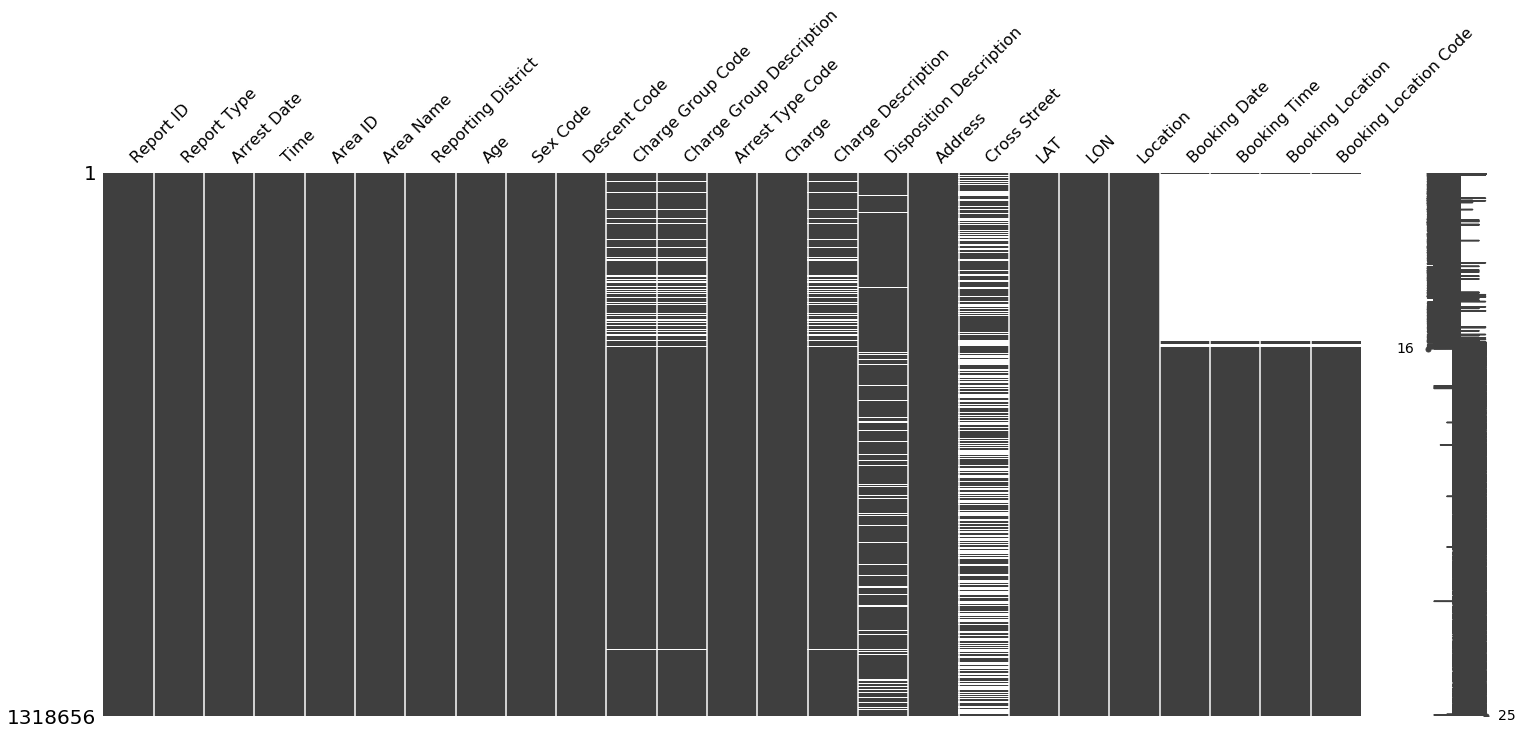

In [4]:
msng.matrix(df);

In [5]:
df.describe()

,Report ID,Time,Area ID,Reporting District,Age,Charge Group Code,LAT,LON,Booking Time,Booking Location Code
count,1.318656e+06,1.318461e+06,1.318656e+06,1.318656e+06,1.318656e+06,1.230128e+06,1.318656e+06,1.318656e+06,904467.000000,904434.000000
mean,4.601647e+07,1.387024e+03,1.022171e+01,1.068717e+03,3.423322e+01,1.610289e+01,3.405586e+01,-1.182804e+02,1275.516149,4249.489166
std,6.397297e+07,6.628987e+02,6.200032e+00,6.185632e+02,1.361060e+01,7.104276e+00,8.341147e-01,2.873834e+00,768.814576,32.215165
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00,0.000000e+00,-1.188513e+02,0.000000,1973.000000
25%,3.463393e+06,9.450000e+02,5.000000e+00,5.240000e+02,2.300000e+01,9.000000e+00,3.401210e+01,-1.184376e+02,454.000000,4212.000000
50%,4.772400e+06,1.510000e+03,1.100000e+01,1.113000e+03,3.200000e+01,1.700000e+01,3.405770e+01,-1.183213e+02,1420.000000,4273.000000
75%,1.114058e+08,1.930000e+03,1.500000e+01,1.546000e+03,4.500000e+01,2.300000e+01,3.416810e+01,-1.182714e+02,1956.000000,4279.000000
max,9.921099e+08,2.400000e+03,2.100000e+01,2.199000e+03,9.700000e+01,9.900000e+01,3.481460e+01,0.000000e+00,2359.000000,4372.000000


In [6]:
df.dtypes

Report ID                     int64
Report Type                  object
Arrest Date                  object
Time                        float64
Area ID                       int64
Area Name                    object
Reporting District            int64
Age                           int64
Sex Code                     object
Descent Code                 object
Charge Group Code           float64
Charge Group Description     object
Arrest Type Code             object
Charge                       object
Charge Description           object
Disposition Description      object
Address                      object
Cross Street                 object
LAT                         float64
LON                         float64
Location                     object
Booking Date                 object
Booking Time                float64
Booking Location             object
Booking Location Code       float64
dtype: object

In [8]:
# convert dates to datetime format
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])
df['Booking Date'] = pd.to_datetime(df['Booking Date'])

In [9]:
df.dtypes

Report ID                            int64
Report Type                         object
Arrest Date                 datetime64[ns]
Time                               float64
Area ID                              int64
Area Name                           object
Reporting District                   int64
Age                                  int64
Sex Code                            object
Descent Code                        object
Charge Group Code                  float64
Charge Group Description            object
Arrest Type Code                    object
Charge                              object
Charge Description                  object
Disposition Description             object
Address                             object
Cross Street                        object
LAT                                float64
LON                                float64
Location                            object
Booking Date                datetime64[ns]
Booking Time                       float64
Booking Loc

___
## Plotting

In [10]:
def int_checker(series):
    checker = 0
    for val in series.dropna():
        if not val.is_integer():
            checker += 1
    print(f'There are {checker} non integers in {series.name}')

In [11]:
[int_checker(df[float_col]) for float_col in [col for col in df.columns if df[col].dtypes == float]]

There are 0 non integers in Time
There are 0 non integers in Charge Group Code
There are 1317490 non integers in LAT
There are 1317879 non integers in LON
There are 0 non integers in Booking Time
There are 0 non integers in Booking Location Code


[None, None, None, None, None, None]

In [12]:
def custom_distplot(series):
    sns.distplot(series.dropna().astype(int))
    plt.show()

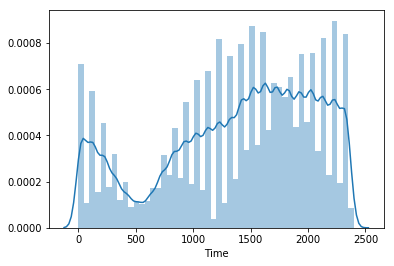

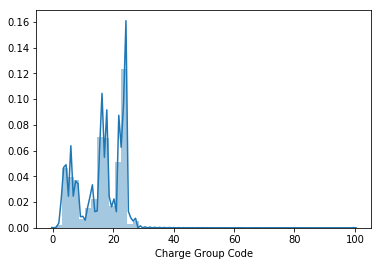

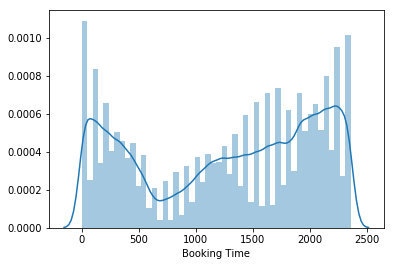

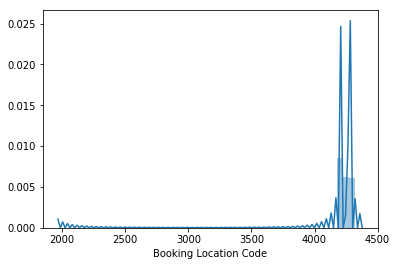

[None, None, None, None]

In [13]:
int_float_cols = ['Time', 'Charge Group Code', 'Booking Time', 'Booking Location Code']

[custom_distplot(df[col]) for col in int_float_cols]

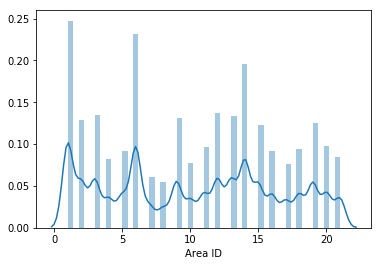

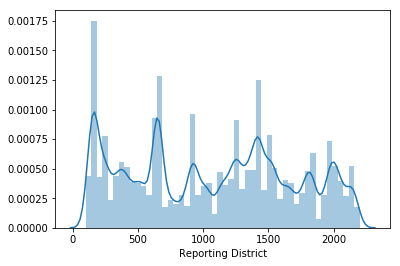

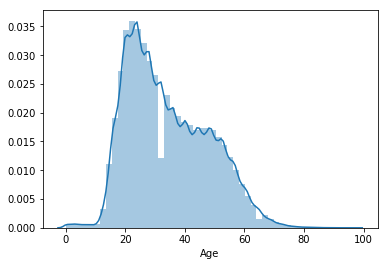

In [14]:
for col in [x for x in df.describe().columns if x not in [
    'Report ID', 'Time', 'Charge Group Code', 'LAT', 'LON', 'Booking Time', 'Booking Location Code']]:
    sns.distplot(df[col])
    plt.show()

___
### Object

In [15]:
def plot_value_counts(col):
    if len(df[col].value_counts()) > 100:
        ht = 100
    else:
        ht = len(df[col].value_counts())

    plt.figure(figsize=(13,ht/3))
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().sort_values(ascending=False).head(100).index
    )
    plt.show()

In [16]:
cat_data = [col for col in df.columns if (df[col].dtypes == object)]
cat_data

['Report Type',
 'Area Name',
 'Sex Code',
 'Descent Code',
 'Charge Group Description',
 'Arrest Type Code',
 'Charge',
 'Charge Description',
 'Disposition Description',
 'Address',
 'Cross Street',
 'Booking Location']

In [17]:
[len(df[col].value_counts()) for col in cat_data]

[2, 21, 2, 19, 27, 5, 9135, 2372, 25, 84357, 20928, 24]

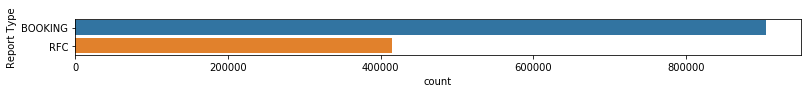

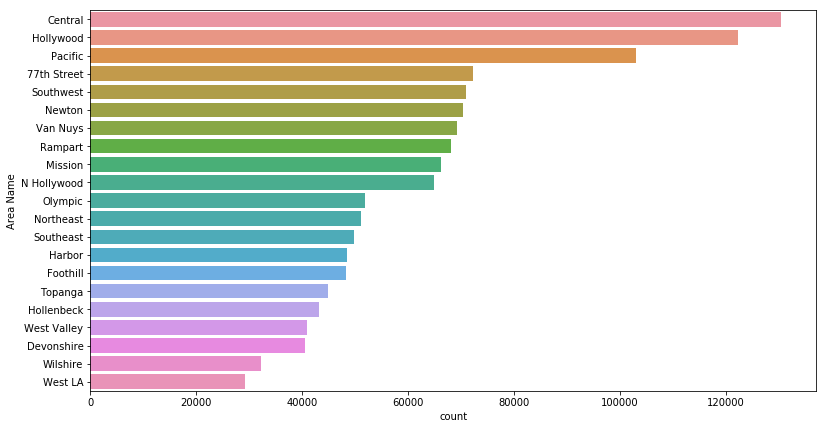

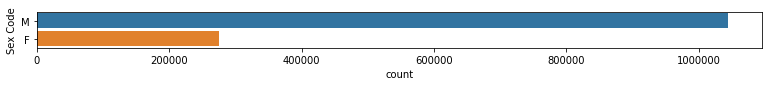

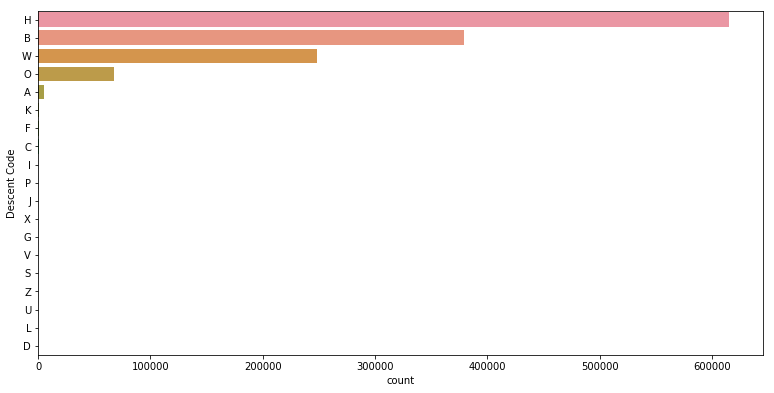

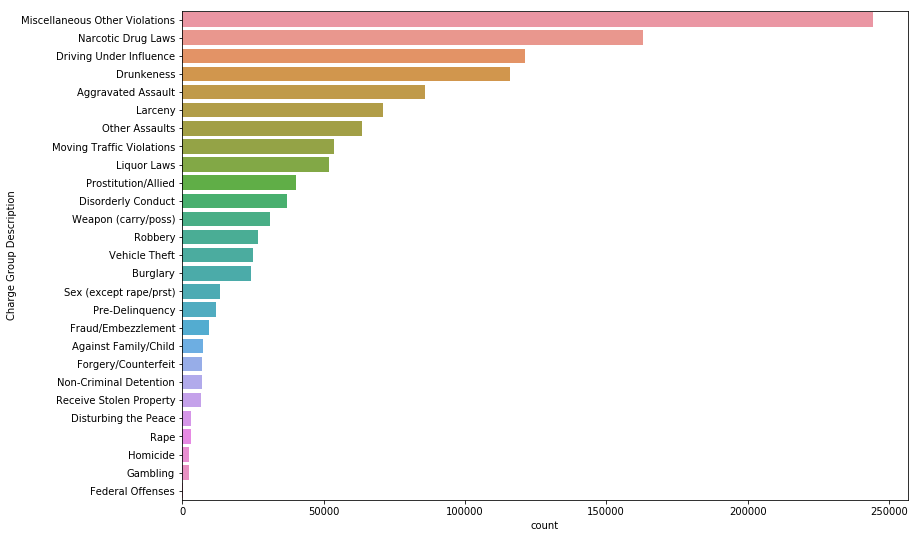

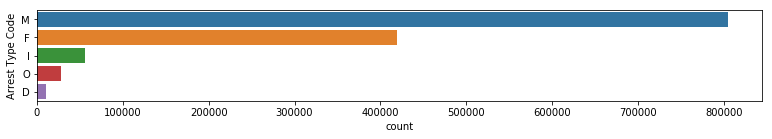

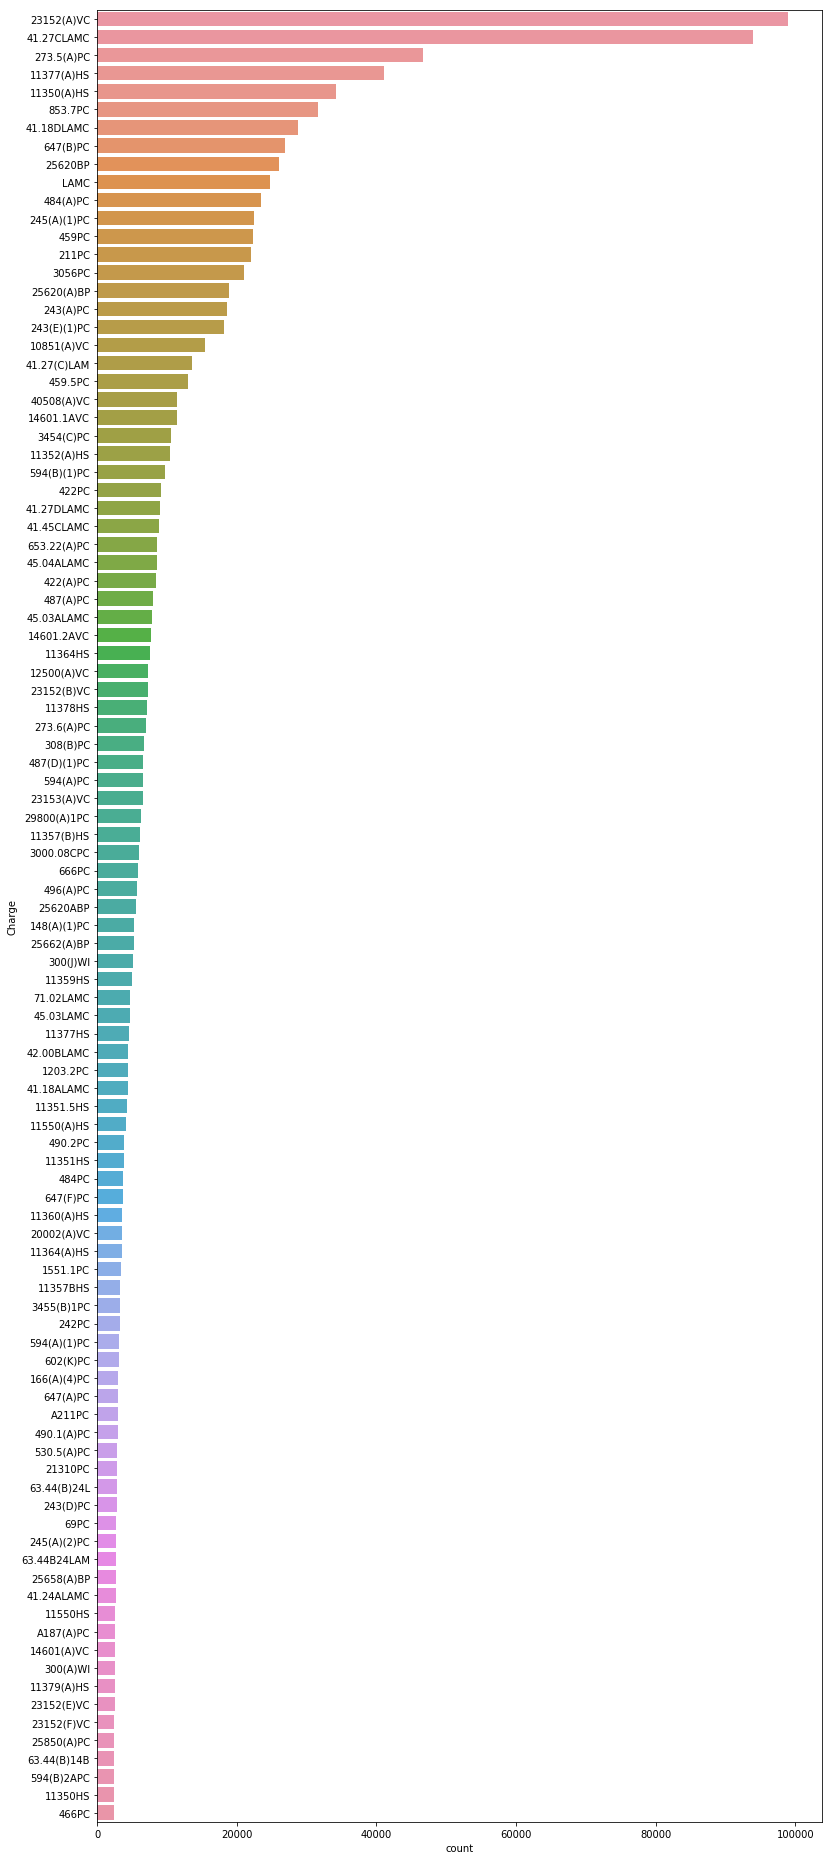

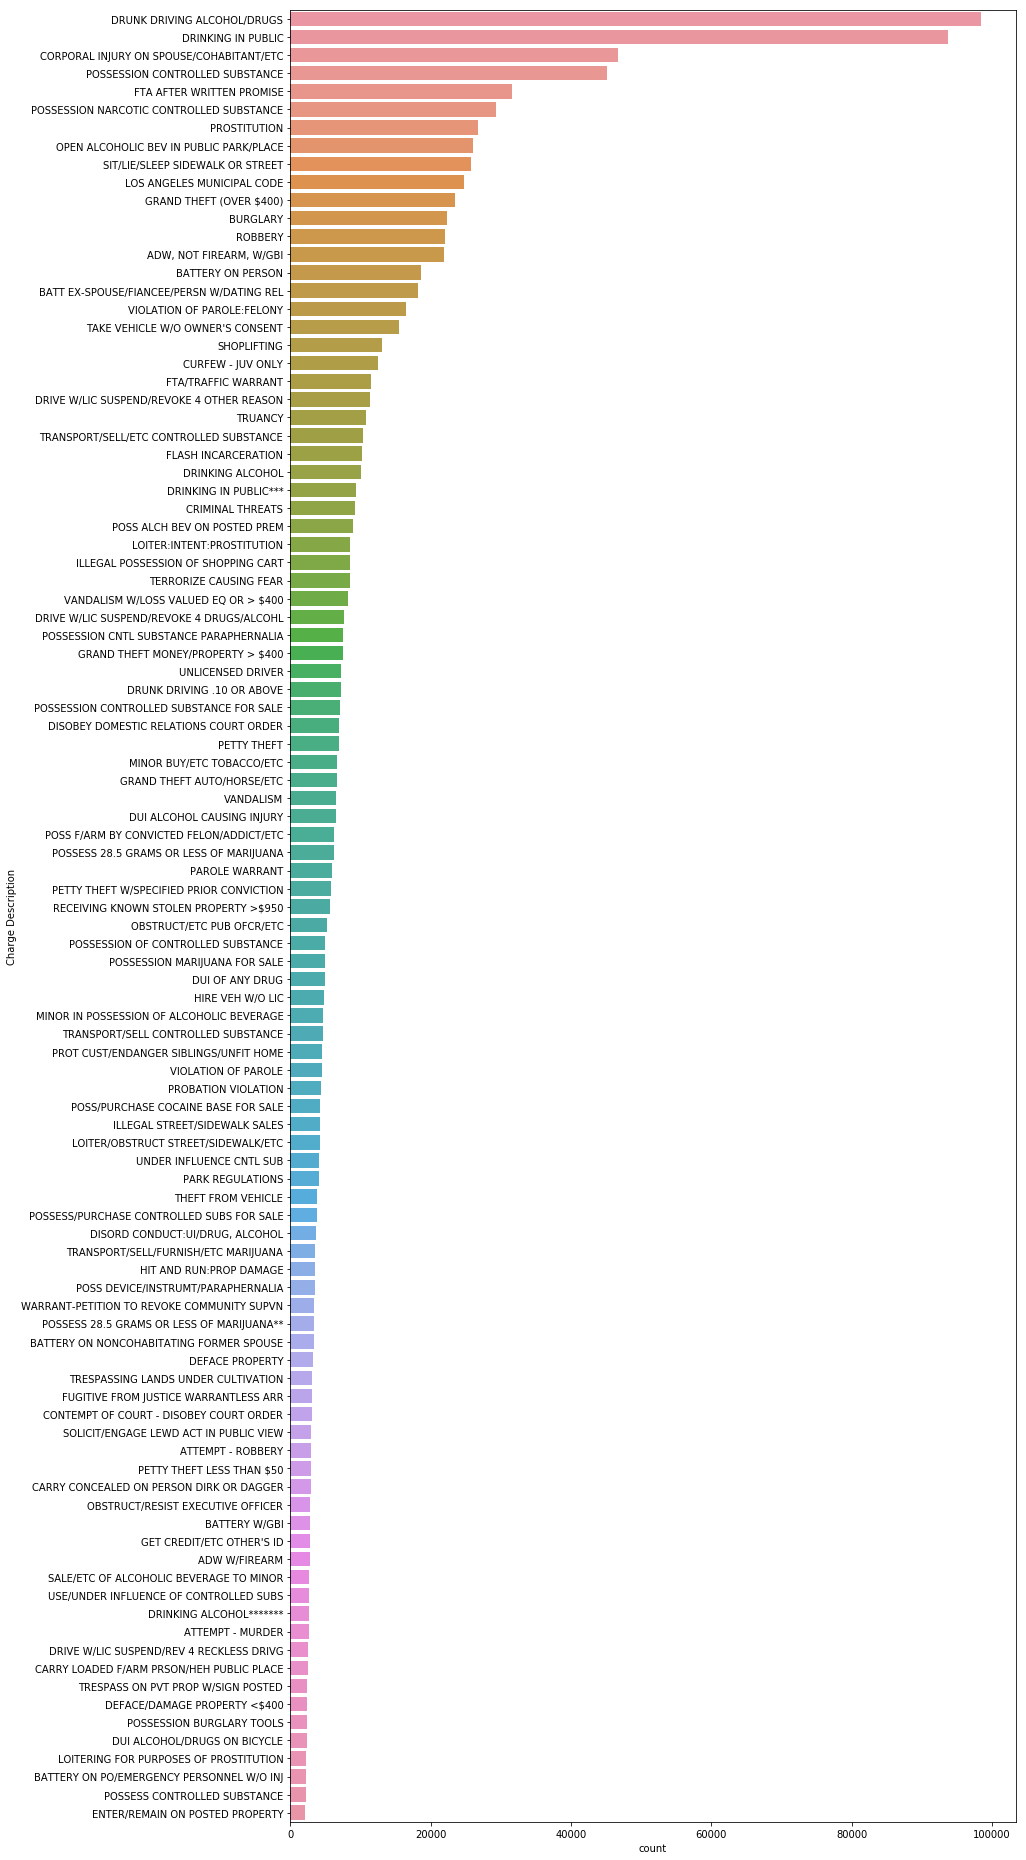

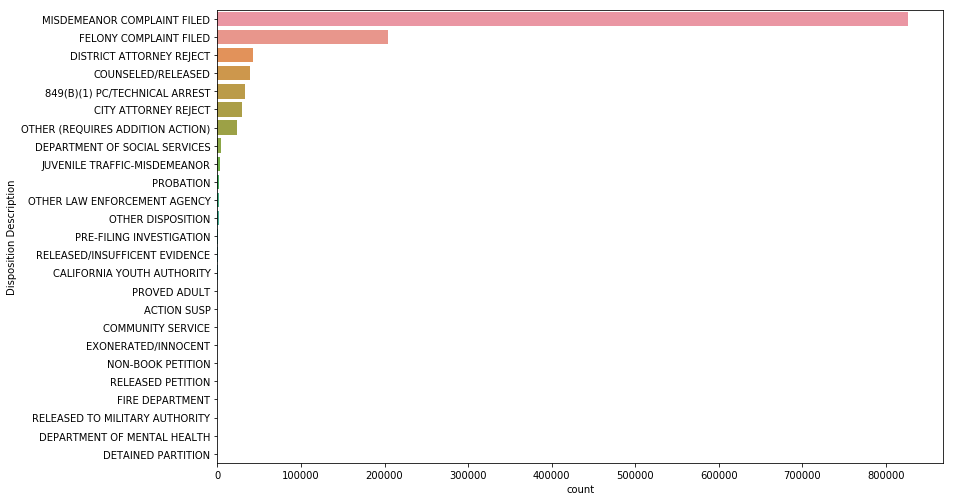

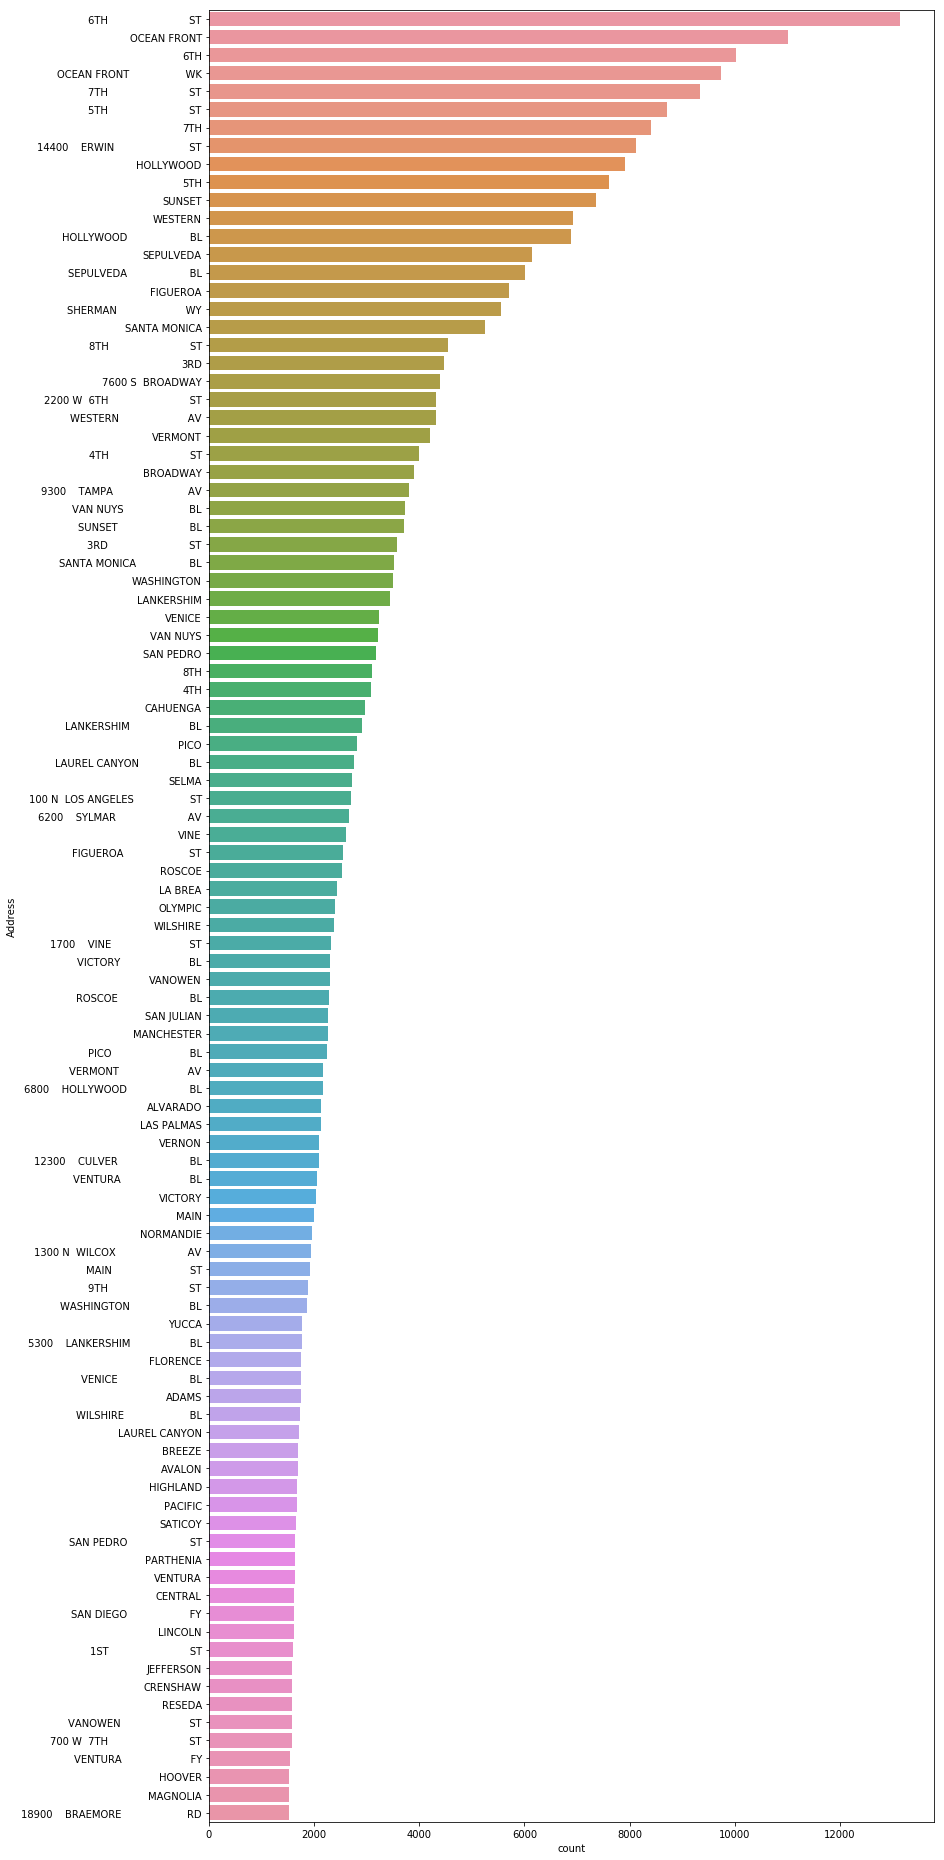

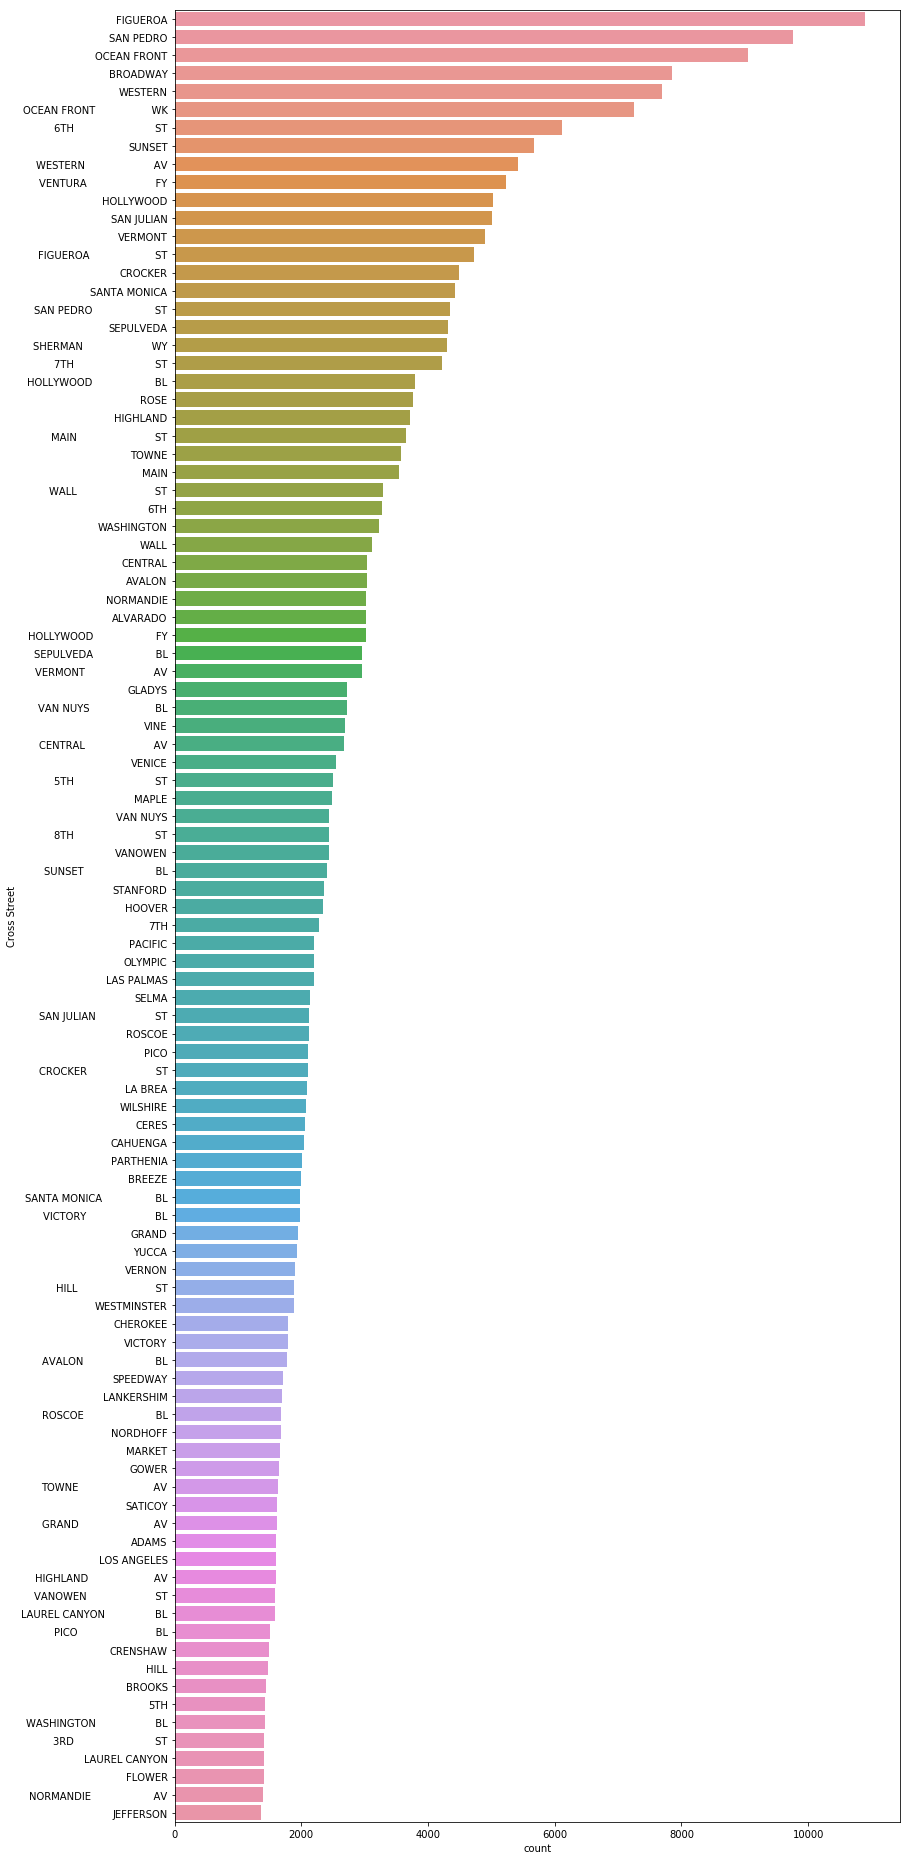

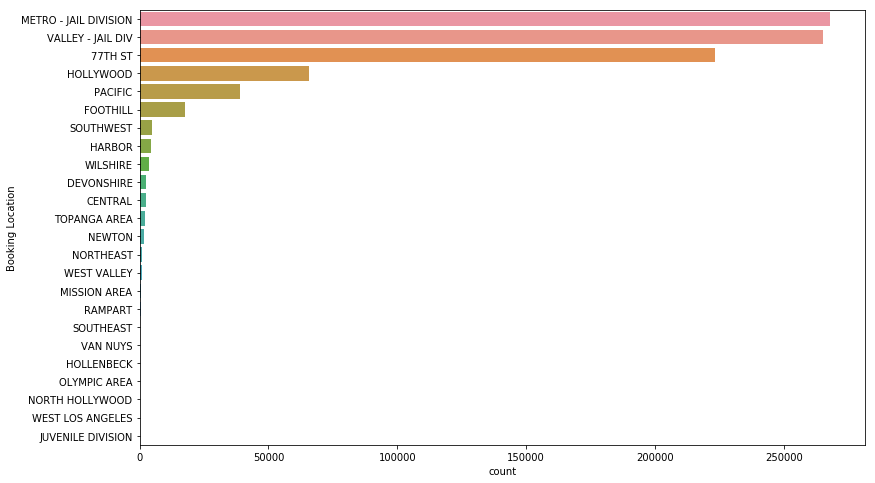

[None, None, None, None, None, None, None, None, None, None, None, None]

In [18]:
[plot_value_counts(col) for col in cat_data]

___

In [19]:
df.drop(df.loc[df['LAT'] == 0].index).describe()

,Report ID,Time,Area ID,Reporting District,Age,Charge Group Code,LAT,LON,Booking Time,Booking Location Code
count,1.317879e+06,1.317684e+06,1.317879e+06,1.317879e+06,1.317879e+06,1.229364e+06,1.317879e+06,1.317879e+06,903732.000000,903699.000000
mean,4.603770e+07,1.387209e+03,1.022352e+01,1.068895e+03,3.423515e+01,1.610192e+01,3.407593e+01,-1.183502e+02,1275.767880,4249.504188
std,6.398210e+07,6.627866e+02,6.200881e+00,6.186499e+02,1.361162e+01,7.104788e+00,1.093341e-01,1.024345e-01,768.811786,32.210469
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00,3.334270e+01,-1.188513e+02,0.000000,1973.000000
25%,3.464382e+06,9.450000e+02,5.000000e+00,5.240000e+02,2.300000e+01,9.000000e+00,3.401230e+01,-1.184377e+02,454.000000,4212.000000
50%,4.773502e+06,1.510000e+03,1.100000e+01,1.113000e+03,3.200000e+01,1.700000e+01,3.405780e+01,-1.183214e+02,1421.000000,4273.000000
75%,1.114064e+08,1.930000e+03,1.500000e+01,1.546000e+03,4.500000e+01,2.300000e+01,3.416830e+01,-1.182715e+02,1956.000000,4279.000000
max,9.921099e+08,2.400000e+03,2.100000e+01,2.199000e+03,9.700000e+01,9.900000e+01,3.481460e+01,-1.177115e+02,2359.000000,4372.000000


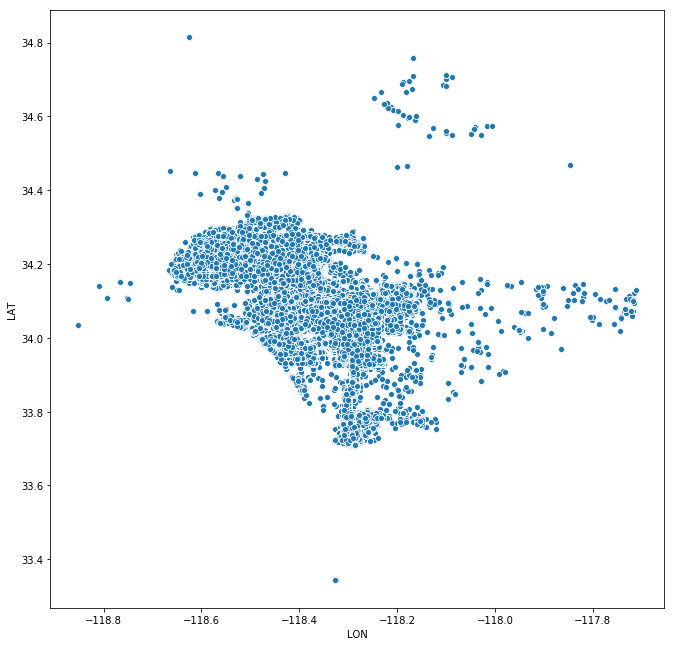

In [20]:
plt.figure(figsize=(11,11))
sns.scatterplot(x=df.drop(df.loc[df['LAT'] == 0].index)['LON'], y=df.drop(df.loc[df['LAT'] == 0].index)['LAT'])
plt.show();

___
## GeoPandas

In [21]:
# shape data provided by http://geohub.lacity.org/datasets/la-times-neighborhood-boundaries
LAmap = gpd.read_file('../../Files/LAPD_Arrest/LA_Times_Neighborhood_Boundaries-shp/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp')

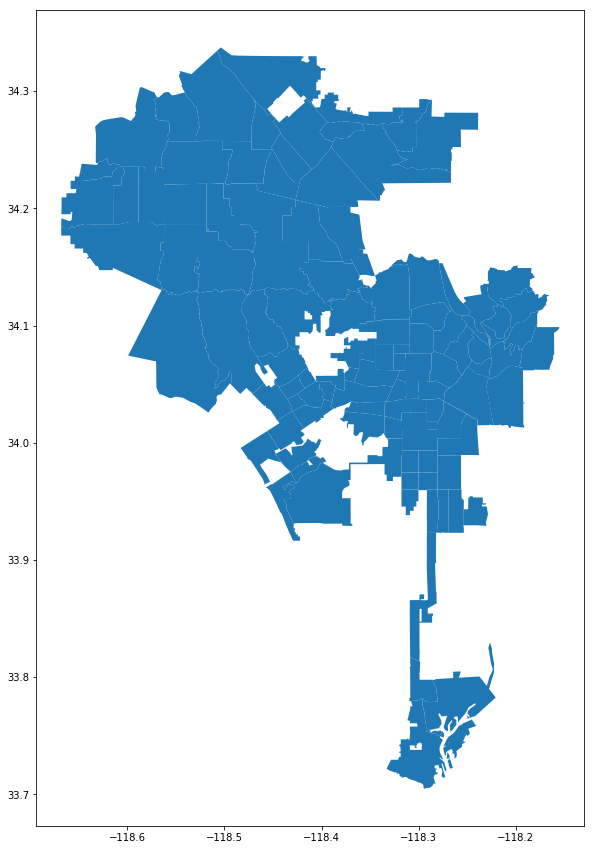

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
LAmap.plot(ax=ax);

In [23]:
crs = {'init' : 'epsg:4326'}
LA_map_df = df.drop(df.loc[df['LAT'] == 0].index)
LA_map_df.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,76089,RFC,2017-02-12,2127.0,21,Topanga,2149,27,M,W,...,MISDEMEANOR COMPLAINT FILED,6800 QUAKERTOWN AV,NaN,34.1938,-118.5699,POINT (-118.5699 34.1938),NaT,NaN,NaN,NaN
1,100107570,RFC,2010-03-11,1200.0,1,Central,181,46,M,W,...,MISDEMEANOR COMPLAINT FILED,1100 S FIGUEROA ST,NaN,34.0437,-118.2652,POINT (-118.2652 34.0437),NaT,NaN,NaN,NaN
2,100112349,RFC,2010-06-14,1440.0,1,Central,138,50,M,W,...,MISDEMEANOR COMPLAINT FILED,300 CROCKER ST,NaN,34.0464,-118.2402,POINT (-118.2402 34.0464),NaT,NaN,NaN,NaN
3,100112759,RFC,2010-06-21,1555.0,1,Central,176,17,F,A,...,NaN,9TH,MAPLE,34.0392,-118.2524,POINT (-118.2524 34.0392),NaT,NaN,NaN,NaN
4,100116101,RFC,2010-08-25,1845.0,1,Central,185,45,M,H,...,MISDEMEANOR COMPLAINT FILED,PICO,MAIN,34.0369,-118.2607,POINT (-118.2607 34.0369),NaT,NaN,NaN,NaN


In [24]:
# if we didn't already have the Location column we could use the LAT and LON columns to get the point geometry
# data we need for geopandas.
geometry = [Point(xy) for xy in zip(LA_map_df['LON'], LA_map_df['LAT'])]
geometry[:5]

In [27]:
# the Location column is essentially an already made geometry list, we just need to convert it to the proper
# format using wkt
df['Location'] = df['Location'].apply(wkt.loads)

In [28]:
geo_df = gpd.GeoDataFrame(LA_map_df, crs=crs, geometry=df['Location'])
geo_df.head()

/Users/Creighton/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/Creighton/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code,geometry
0,76089,RFC,2017-02-12,2127.0,21,Topanga,2149,27,M,W,...,6800 QUAKERTOWN AV,NaN,34.1938,-118.5699,POINT (-118.5699 34.1938),NaT,NaN,NaN,NaN,POINT (-118.56990 34.19380)
1,100107570,RFC,2010-03-11,1200.0,1,Central,181,46,M,W,...,1100 S FIGUEROA ST,NaN,34.0437,-118.2652,POINT (-118.2652 34.0437),NaT,NaN,NaN,NaN,POINT (-118.26520 34.04370)
2,100112349,RFC,2010-06-14,1440.0,1,Central,138,50,M,W,...,300 CROCKER ST,NaN,34.0464,-118.2402,POINT (-118.2402 34.0464),NaT,NaN,NaN,NaN,POINT (-118.24020 34.04640)
3,100112759,RFC,2010-06-21,1555.0,1,Central,176,17,F,A,...,9TH,MAPLE,34.0392,-118.2524,POINT (-118.2524 34.0392),NaT,NaN,NaN,NaN,POINT (-118.25240 34.03920)
4,100116101,RFC,2010-08-25,1845.0,1,Central,185,45,M,H,...,PICO,MAIN,34.0369,-118.2607,POINT (-118.2607 34.0369),NaT,NaN,NaN,NaN,POINT (-118.26070 34.03690)


In [37]:
pd.to_datetime('2019-01-01') < pd.to_datetime('2020-01-01')

True

In [44]:
geo_2019_df = geo_df.loc[geo_df['Arrest Date'] >= pd.to_datetime('2019-01-01')]
geo_2010_df = geo_df.loc[(geo_df['Arrest Date'] >= pd.to_datetime('2010-01-01')) & 
                         (geo_df['Arrest Date'] <= pd.to_datetime('2010-12-31'))]

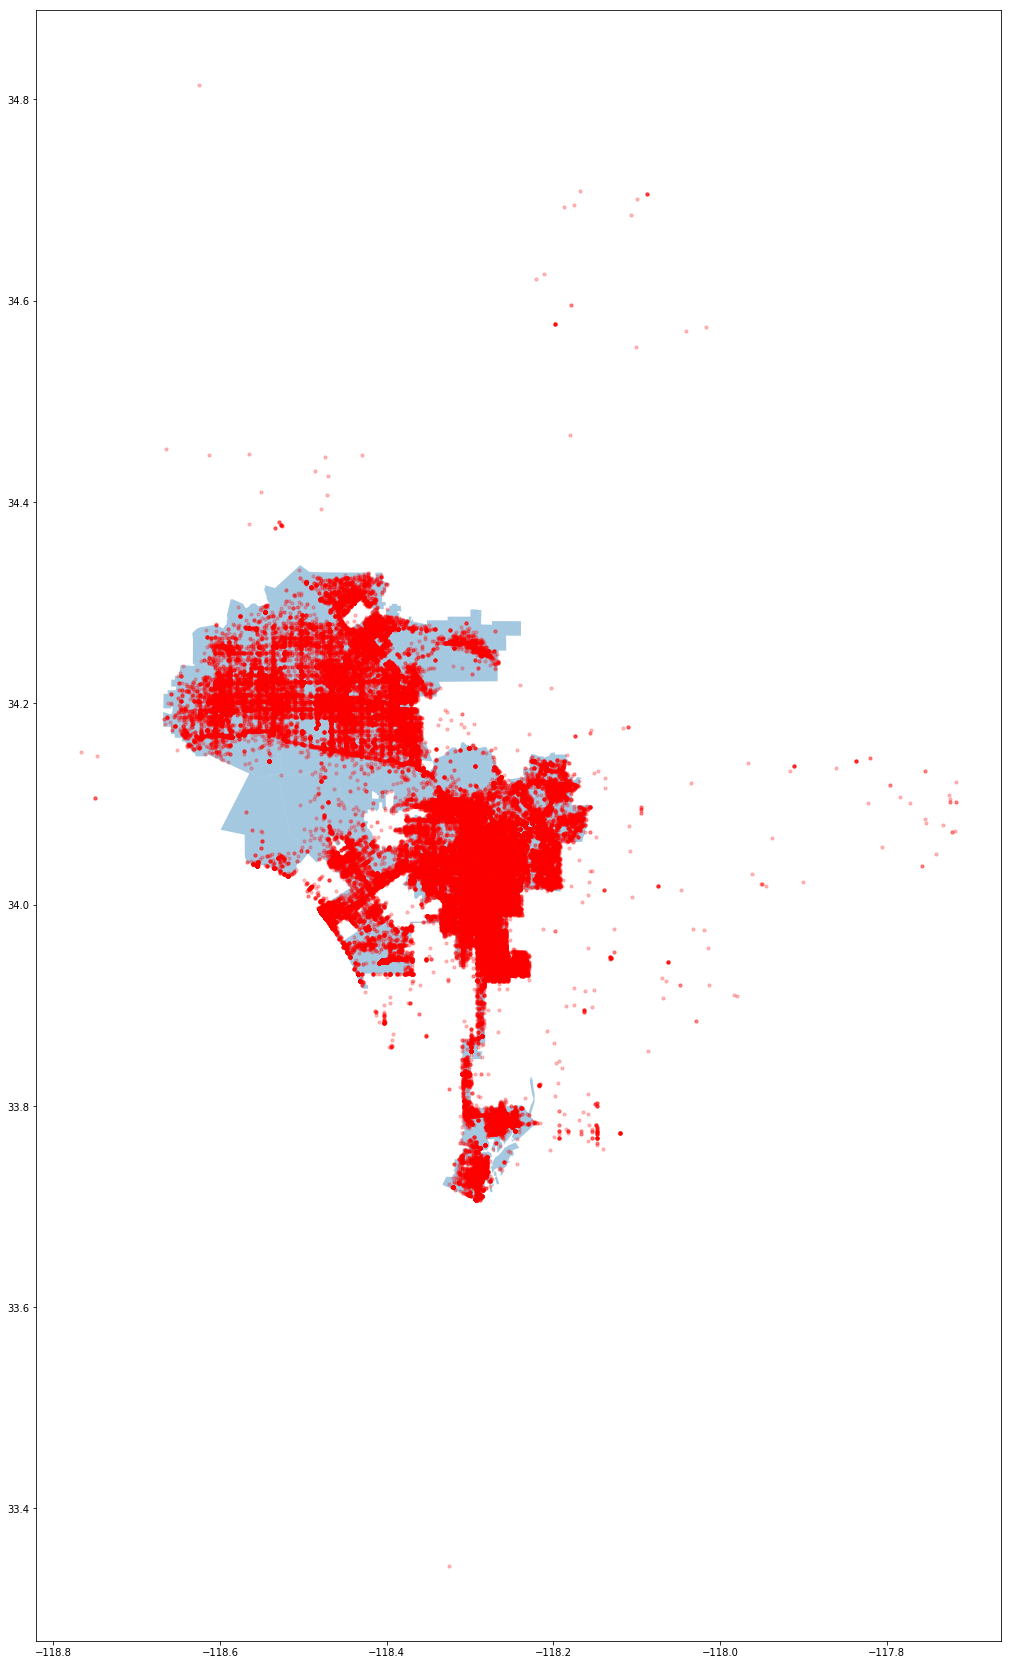

In [45]:
fig, ax = plt.subplots(figsize=(30,30)) # initialize our plot
LAmap.plot(ax = ax, alpha = .4) # plot our LA shape file
geo_2010_df.plot(ax = ax, markersize=10, color="red", alpha = .25); # plot our gps data

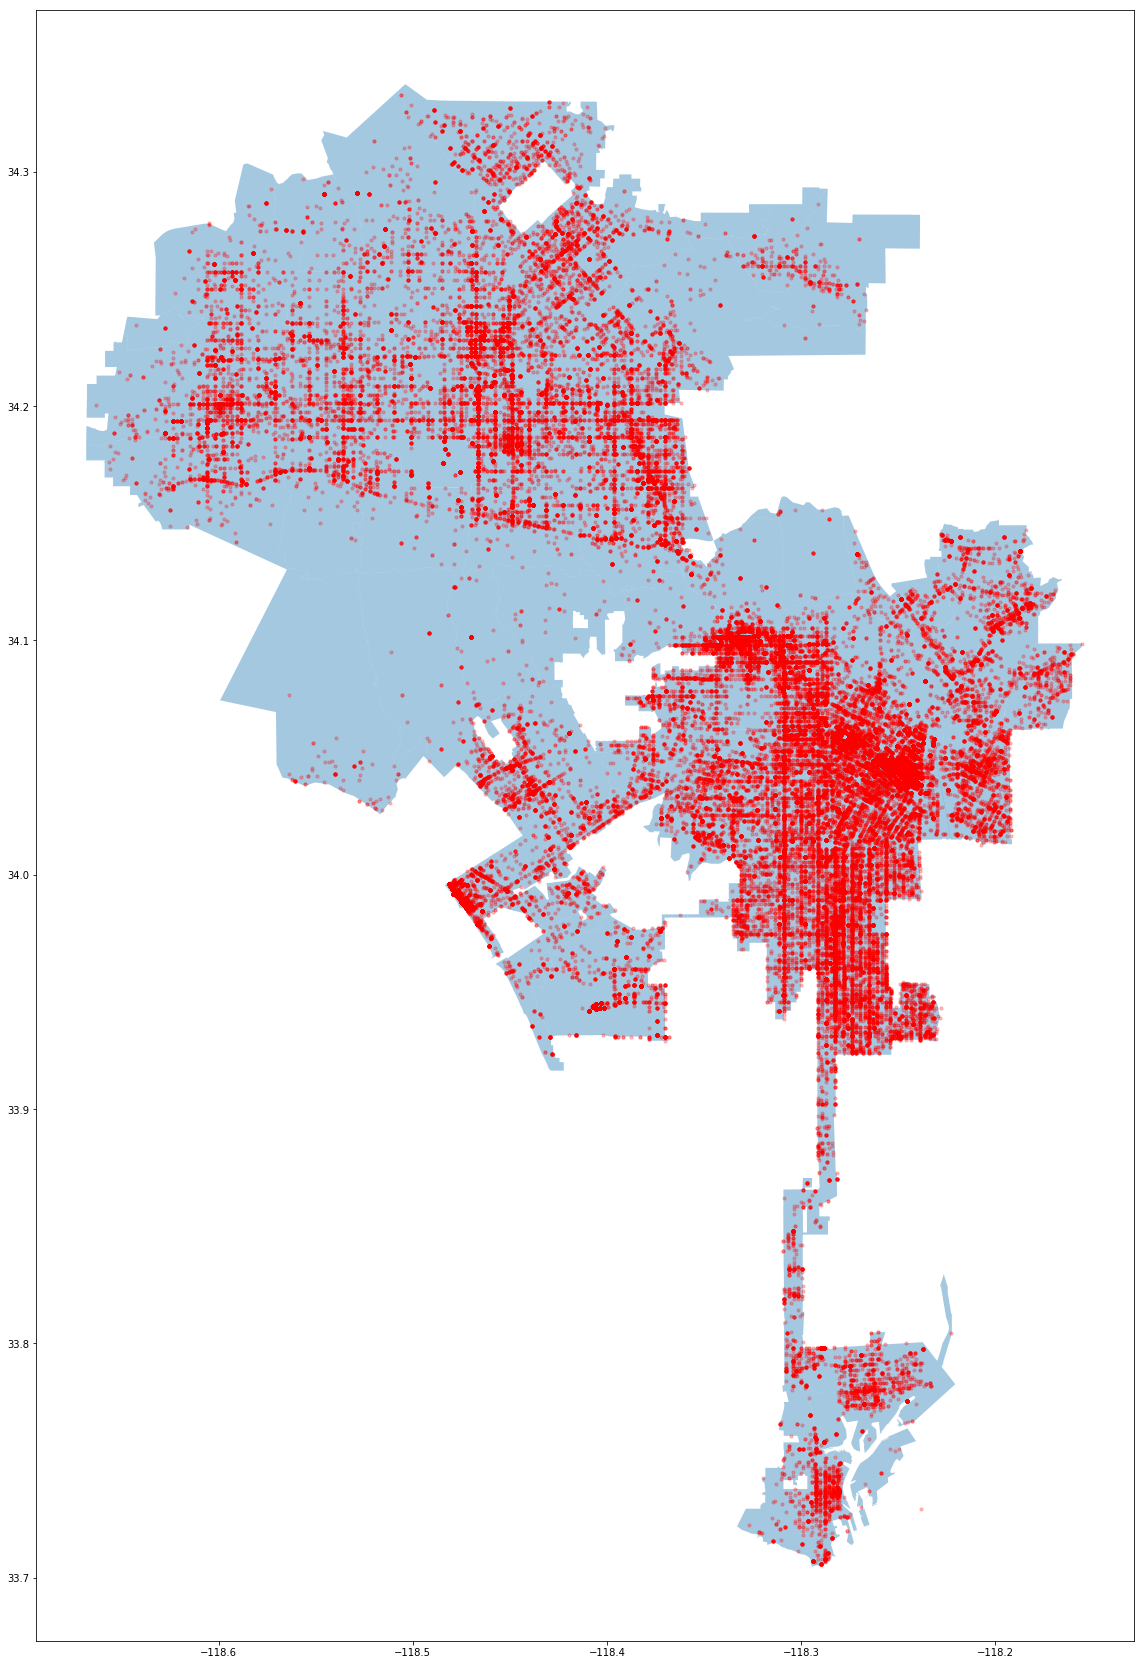

In [46]:
fig, ax = plt.subplots(figsize=(30,30)) # initialize our plot
LAmap.plot(ax = ax, alpha = .4) # plot our LA shape file
geo_2019_df.plot(ax = ax, markersize=10, color="red", alpha = .25); # plot our gps data